<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第8课 数据可视化 I - 美国人的死因分析</h1>

#### 目录
1. [美国人是怎么死的?死亡率之可视化](#top)
1. [matplotlib库](#mpl)
1. [获得数据](#getdata)
1. [理解数据](#understand)
1. [死亡: 年份](#year)
1. [死亡: 男性 vs. 女性](#gender)
1. [死亡: 年龄](#age)
1. [死亡: 年龄 & 性别](#ageXgender)
1. [死亡: 2015十大死因](#causeX2015)
1. [死亡: 每年十大死因](#causeXyear)
1. [死亡: 来自性别的死因](#causeXgender)
1. [死亡: 来自年龄的死因](#causeXage)
1. [死亡: 来自性别和年龄的死因](#causeXgenderXage)

# 美国人是怎么死的? 死亡率之可视化

**死亡** 一个可怕的主题，也是一个政府相当关心的主题。

在美国，疾病控制和预防中心（CDC）统计了一份从1999年至2015年的数据。这份数据信息量很丰富，包括死亡年龄、死因、性别甚至种族和地理城市。

对于这些数据，我们有下面三个问题 :
- 美国最大的死因是什么? 
- 男人比女人更容易死吗? 死亡与年龄相关吗? 
- 随着时间的推移，哪些死因变得更加流行，哪些死因变得少见？

#### 学习数据可视化

**matplotlib**，python最流行的数据可视化包之一。

有很多不同方式去使用matplotlib，在此只介绍最基础的。如果你有兴趣，更多内容见文档[here](http://matplotlib.org/).

<a id="mpl"></a>
## 载入 `matplotlib` 库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imp import reload

#enable graphs to be displayed in notebooks
%matplotlib inline 

#enable encoding of Chinese characters
import sys
reload(sys) 
#python2 sys.setdefaultencoding('GBK') #warning may display but is OK

<module 'sys' (built-in)>

<a id="getdata"></a>
## 获得数据

从下面的链接中下载deaths.csv

In [ ]:
#linux !wget --output-document /resources/data/deaths.csv https://ibm.box.com/shared/static/10iexjaa280qz4xcdtu98xlv51hqiybe.csv

读取 `deaths.csv`文件内容:

In [2]:
#linux df = pd.read_csv("/resources/data/deaths.csv", encoding='GBK')
df = pd.read_csv("resources/data/deaths.csv", encoding='GBK')

很好! 现在数据都在变量**`df`**内了

<a id="understand"></a>
## 理解数据

#### 前10行:

In [3]:
df.head(310)

,Cause,CauseCN,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2015,3,1942904,Unreliable
3,Salmonella infections,沙门氏菌感染,GR113-001,1,F,2005,0,1950494,Unreliable
4,Salmonella infections,沙门氏菌感染,GR113-001,1,F,2010,0,1947217,Unreliable
5,Salmonella infections,沙门氏菌感染,GR113-001,1,F,2015,0,1939269,Unreliable
6,Salmonella infections,沙门氏菌感染,GR113-001,2,F,2005,0,1932337,Unreliable
7,Salmonella infections,沙门氏菌感染,GR113-001,2,F,2010,0,2004731,Unreliable
8,Salmonella infections,沙门氏菌感染,GR113-001,2,F,2015,0,1939979,Unreliable
9,Salmonella infections,沙门氏菌感染,GR113-001,3,F,2005,0,1930395,Unreliable


#### 倒数5行:

In [4]:
df.tail(5)

,Cause,CauseCN,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
30901,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,99,M,2010,6,Not Applicable,Not Applicable
30902,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,99,M,2015,7,Not Applicable,Not Applicable
30903,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,100,M,2005,8,Not Applicable,Not Applicable
30904,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,100,M,2010,4,Not Applicable,Not Applicable
30905,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,100,M,2015,14,Not Applicable,Not Applicable


#### 死亡年龄的汇总情况

In [5]:
df.Age.describe()

count    30906.000000
mean        50.000000
std         29.155231
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: Age, dtype: float64

#### 数据集涉及了哪几个年份?

In [6]:
df.Year.unique()

array([2005, 2010, 2015])

#### 确认性别是否只有男性male和女性female。

In [7]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

#### 死亡人数汇总?

In [8]:
df.Deaths.describe()

count    30906.000000
mean       211.636511
std        930.959087
min          0.000000
25%          0.000000
50%          2.000000
75%         41.000000
max      13846.000000
Name: Deaths, dtype: float64

#### 数据集中有哪些死因?

In [9]:
causes = df[['Cause', 'CauseCN']].drop_duplicates(subset = ['Cause','CauseCN']) #remove duplicates
causes = causes.sort_values(['Cause']) #sort
causes.index=range(0, len(causes)) #re-index the row numbers
causes

,Cause,CauseCN
0,Accidents (unintentional injuries),事故（意外伤害）
1,Acute bronchitis and bronchiolitis,急性支气管炎和细支气管炎
2,Acute poliomyelitis,急性脊髓灰质炎
3,Alzheimer's disease,阿尔茨海默氏病
4,Anemias,贫血
5,Aortic aneurysm and dissection,主动脉瘤和解剖
6,Arthropod-borne viral encephalitis,节肢动物传播的病毒性脑炎
7,Assault (homicide),袭击（杀人）
8,Atherosclerosis,动脉粥样硬化
9,Cerebrovascular diseases,脑血管疾病


<a id="year"></a>
## 死亡: 年份

#### 再看看数据:

In [10]:
df.head(3)

,Cause,CauseCN,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2015,3,1942904,Unreliable


####  2005, 2010，2015死亡人数分别为多少?

我们先按照年份进行分组，然后对**死亡数**列求和，就可以得到每年的死亡数

In [11]:
by_year = df.groupby("Year").Deaths.sum()
by_year

Year
2005    2143662
2010    2102234
2015    2294942
Name: Deaths, dtype: int64

使用 **`.plot()`**画图

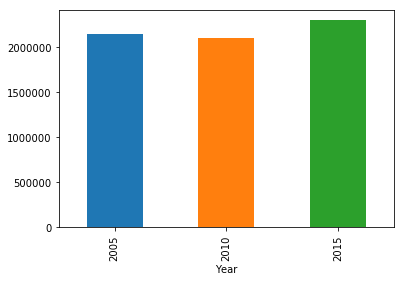

In [12]:
by_year.plot(kind = "bar")

#### 我们可以用一句话重写上述过程，这样看起来更加简洁。

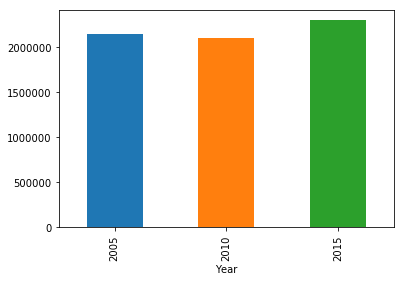

In [13]:
# Making syntax easier to read. \ tells Python to continue to the next line before executing 
df.groupby("Year")\
.Deaths\
.sum()\
.plot(kind = "bar")

<a id="gender"></a>
## 死亡: 男性 vs. 女性

在2015年，哪个性别死亡率更高？

In [14]:
df2015 = df[df.Year == 2015]

df2015\
.groupby("Gender")\
.Deaths\
.sum()

Gender
F    1103789
M    1191153
Name: Deaths, dtype: int64

#### <font color="red"> 练习: </font>你可以创建一个简单的图来表示每个性别的死亡总数吗?

注意，使用2015年的数据。

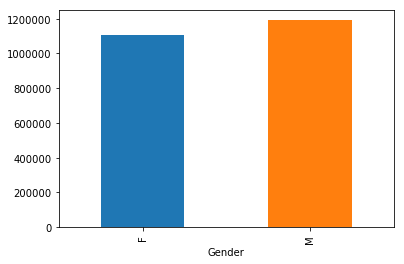

In [15]:
## HIDE AS SOLUTION:
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind = "bar")

让我们给图上色: <font color=red>红色</font>表示女性<font color=blue>蓝色</font>表示男性.
我们可以这样添加颜色：
> `.plot(kind = "bar", ` **`color = ["red", "blue"]`**`)`

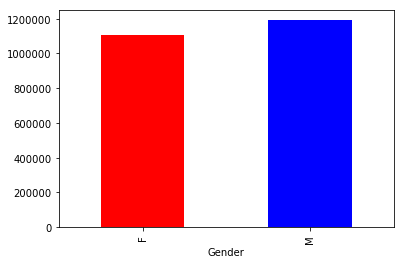

In [16]:
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind = "bar", color=['red', 'blue'])

<a id="age"></a>
## 死亡: 年龄

2015年死亡人员的年龄情况？

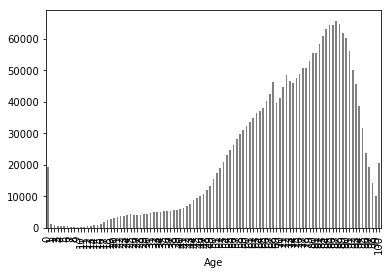

In [17]:
df2015\
.groupby("Age")\
.Deaths\
.sum()\
.plot(kind = "bar", color = "grey")

上面这张图比较难观察，太小了！

我们可以增大图的尺寸
> `.plot(kind = "bar",`** figsize = [18,6]**`)`

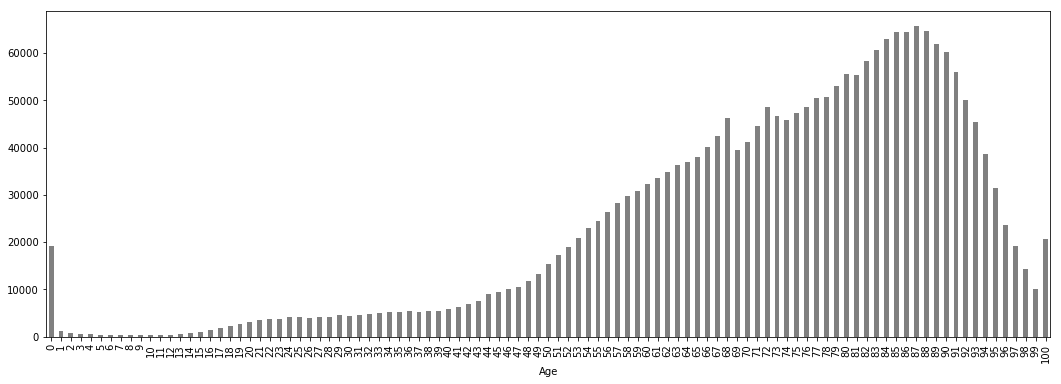

In [18]:
df2015\
.groupby("Age")\
.Deaths\
.sum()\
.plot(kind = "bar", color = "grey", figsize = [18,6])

<font color="green"> 讨论: 你从图中发现了什么? </font>

<a id="ageXgender"></a>
## 死亡: 年龄和性别

#### 死亡年龄与性别有关吗？

根据两个变量进行分组：
> `.groupby(`**`["Age", "Gender"]`**`)`

In [19]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()

Age  Gender
0    F          8634
     M         10512
1    F           470
     M           645
2    F           335
     M           448
3    F           239
     M           372
4    F           191
     M           280
5    F           185
     M           252
6    F           197
     M           215
7    F           168
     M           191
8    F           149
     M           206
9    F           143
     M           215
10   F           117
     M           209
11   F           147
     M           207
12   F           166
     M           240
13   F           230
     M           311
14   F           282
     M           454
               ...  
86   F         34950
     M         29452
87   F         36181
     M         29581
88   F         36741
     M         27971
89   F         36253
     M         25708
90   F         36327
     M         23963
91   F         34454
     M         21538
92   F         31655
     M         18526
93   F         29469
     M         16069
9

#### 让我们创建两个子图，分别是女性和男性的死亡年龄。
> ...  
> **`.unstack(1)`**`\`  
> `.plot(kind = "bar", ` **` subplots = True`**`)`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c31d1d0>,
      dtype=object)

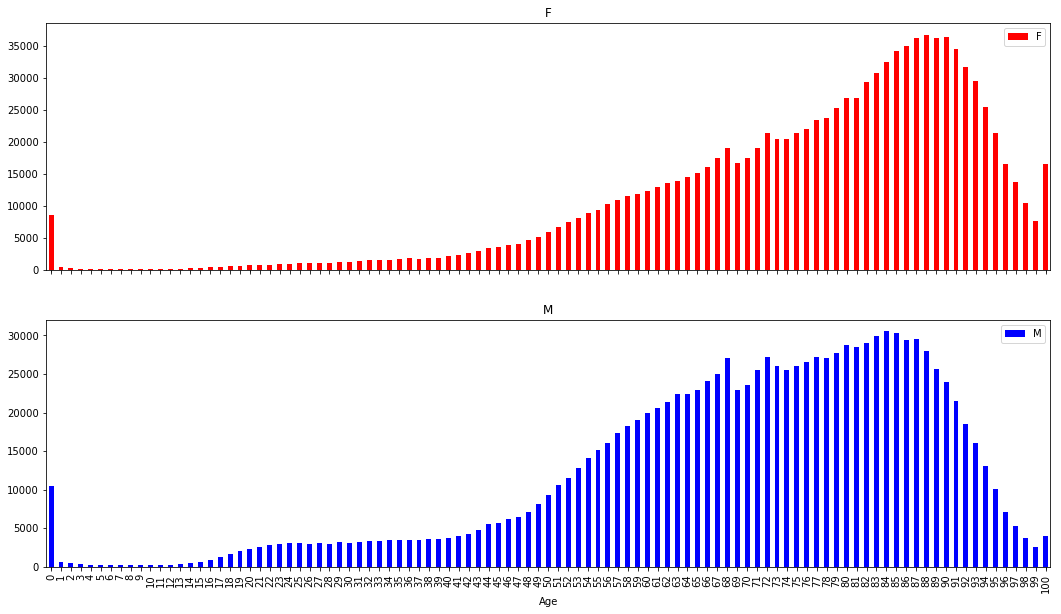

In [20]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "bar", color = ["red","blue"], figsize = [18,10], subplots = True)

<font color="green"> 讨论: 从图中你发现了什么? </font>

我们可以把男性和女性的数据堆在一张图里：
>`.plot(kind = "bar", ` **`stacked = True`**`)`

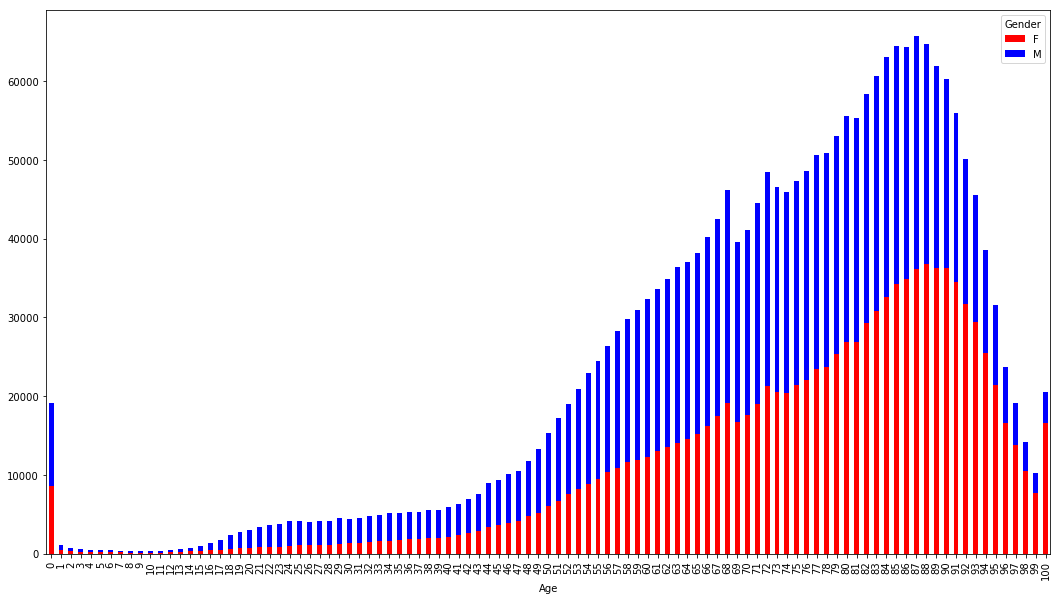

In [21]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "bar", color = ["red","blue"], figsize = [18,10], stacked = True)

但是这并不能很好地对比两个性别的差距。

#### 因为年龄是数值变量，所以使用折线图可能更加容易对比:
> `.plot(kind = "`**`line`**`")`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d0f7668>,
      dtype=object)

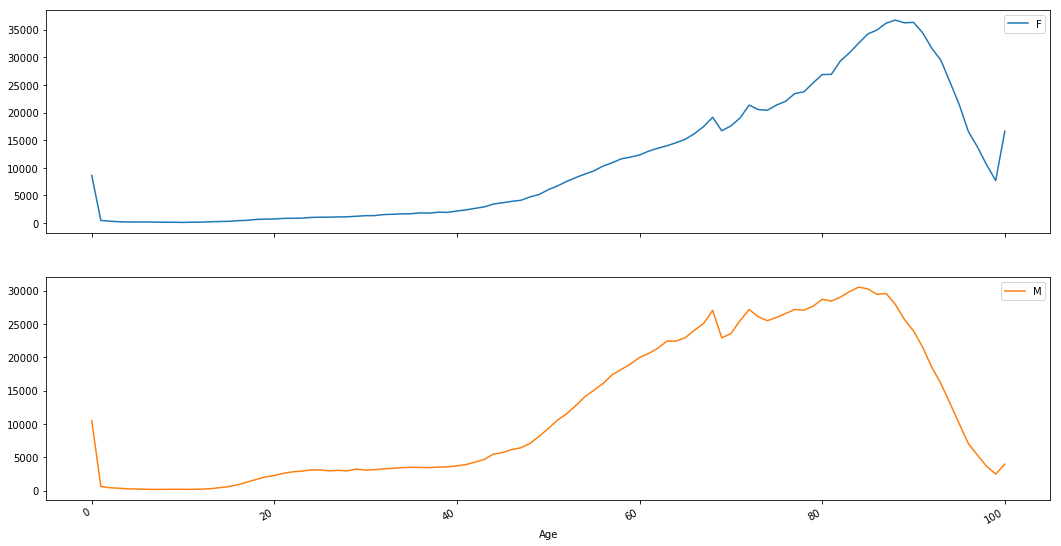

In [22]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "line", figsize = [18,10], subplots = True)

有了曲线之后，对比变得方便了，我们要把两根线同时绘制到一张图:
>`...`  
>**`.unstack(1)`**`\`  
>`.plot(kind = "line")   #Default: subplots = False`

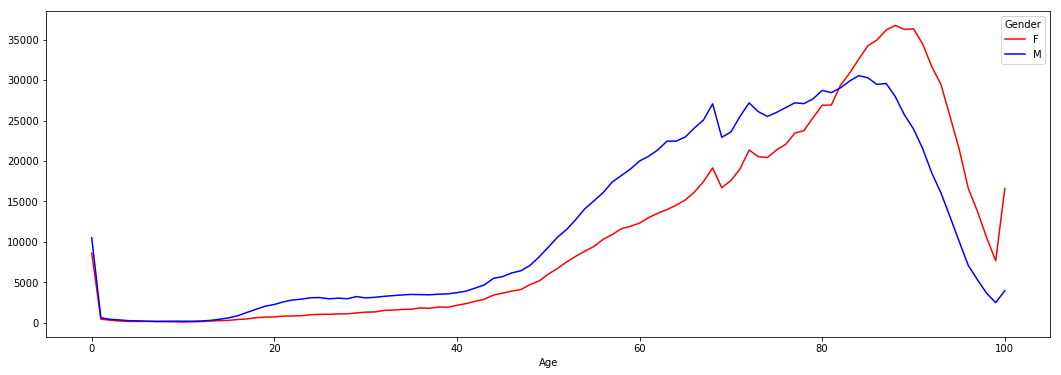

In [23]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "line", color = ["red","blue"], figsize = [18,6])

让我们增加一个题目和y坐标的名称。

> `.plot(kind = "line",` **`title = "Deaths in 2015 by Age and Gender"`**`)`


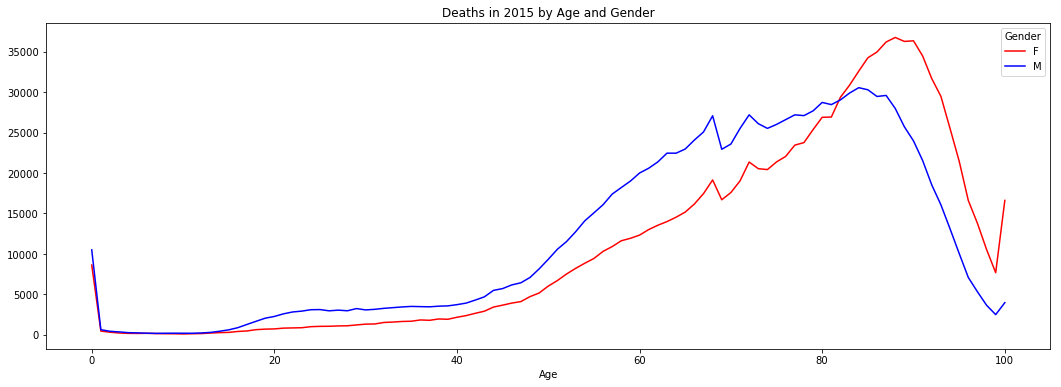

In [24]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "line", color = ["red","blue"], figsize = [18,6], title = "Deaths in 2015 by Age and Gender")

<a id="causeX2015"></a>
## 死亡: 2015年最大死因

让我们查看一下2015年最大的死因。

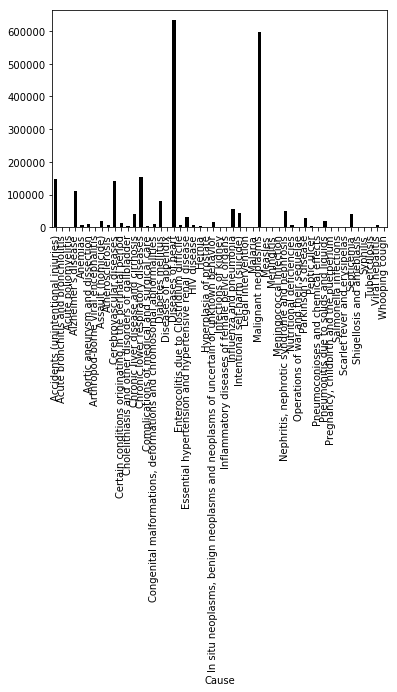

In [25]:
df2015\
.groupby(["Cause"])\
.Deaths\
.sum()\
.plot(kind = "bar", color = "black")

这张图观察起来非常困难，我们需要先对数据**排序**，然后将图表**旋转90度**。
1. 数据排序:
> **`.sort('Deaths', ascending = True)`**

2. 创建水平柱状图 
> **`.plot(kind = "barh")`**

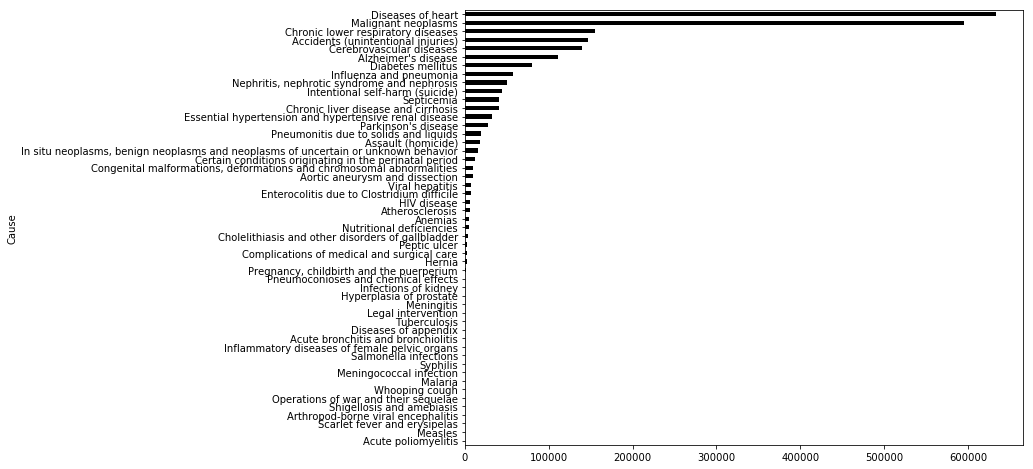

In [26]:
df2015\
.groupby(["Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending = True)\
.plot(kind = "barh", legend = False, color = "black", figsize = [10,8])

#### 让我们找出2015年十大死因

我们可以在排序后取最后的10个死因:
>`.sort('Deaths', ascending = True)`**`[-10:]`**`\`

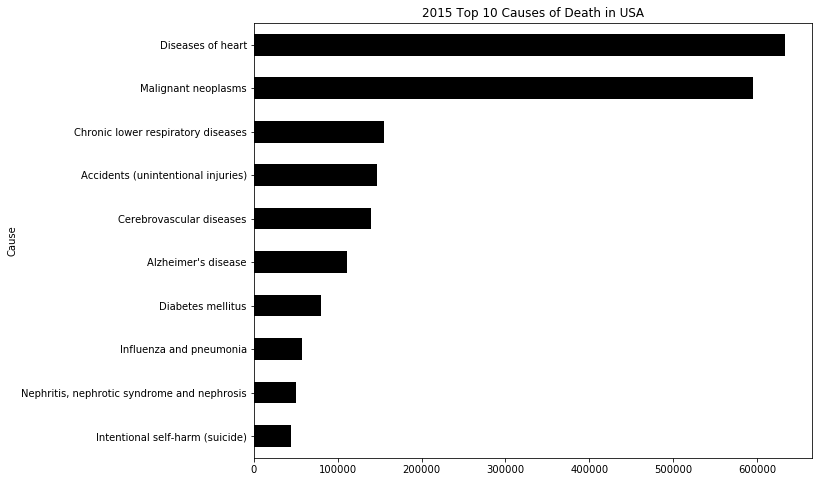

In [27]:
df2015\
.groupby(["Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths')[-10:]\
.plot(kind = "barh", legend = False, color = "black", figsize = [10,8], title = "2015 Top 10 Causes of Death in USA")

<a id="causeXyear"></a>
## 死亡: 每年的最大死因

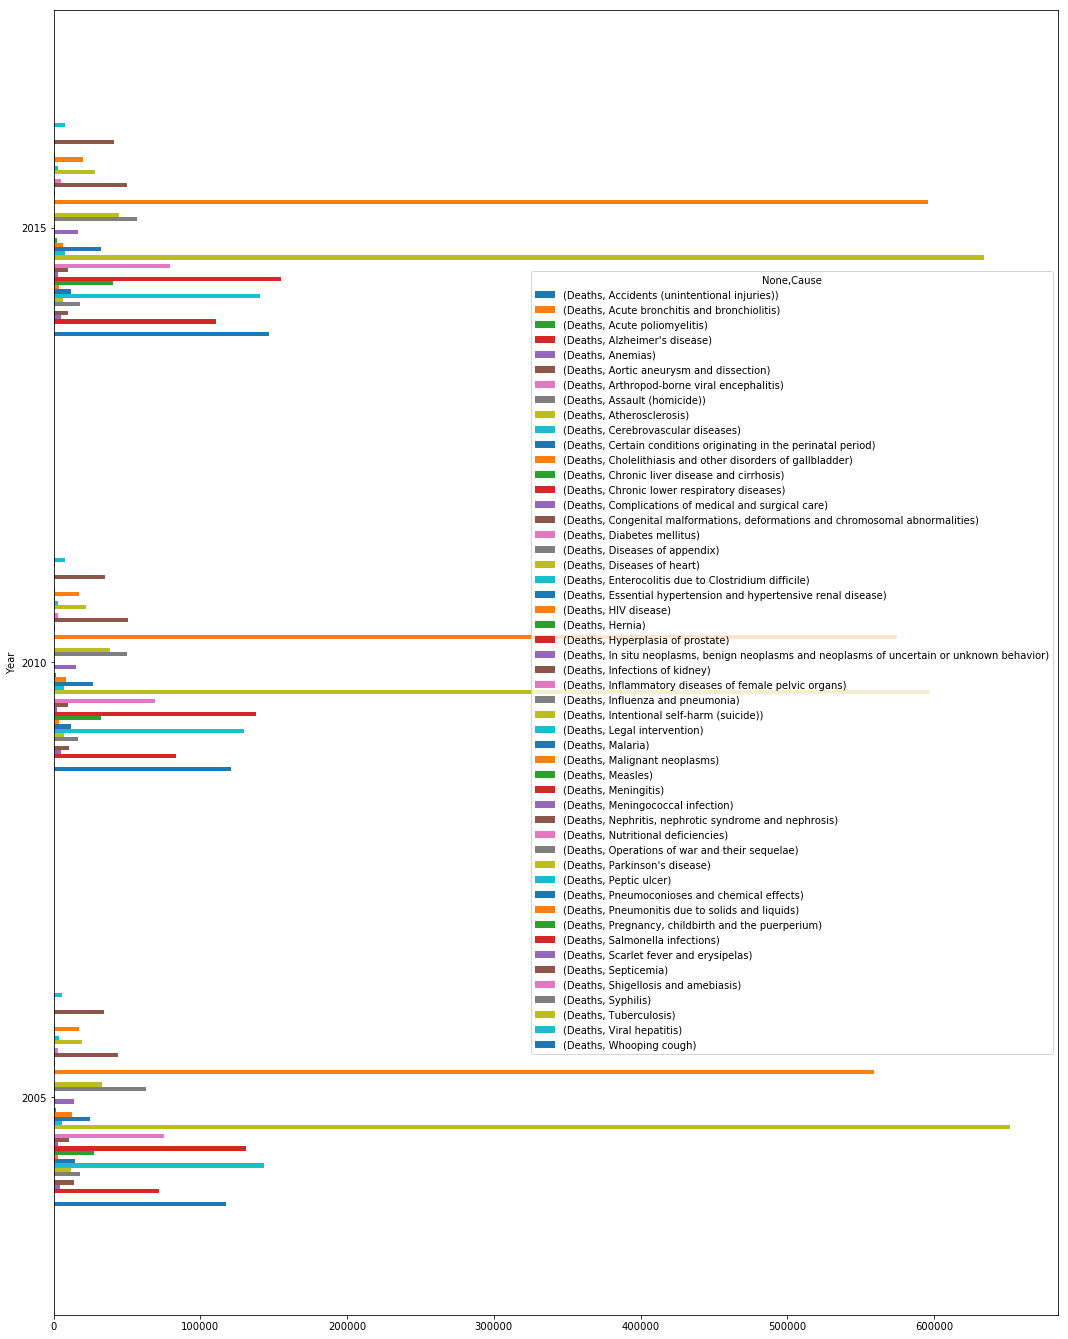

In [37]:
df\
.groupby(["Cause","Year"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths')[0:]\
.unstack(0)\
.plot(kind = "barh", legend = True, figsize = [18,24])

这张图内容太多，有很多信息并不直观，例如，你注意到HIV的死亡率在2005年后逐渐走低了吗？


<a id="causeXgender"></a>
## 死亡: 跟性别有关的死因

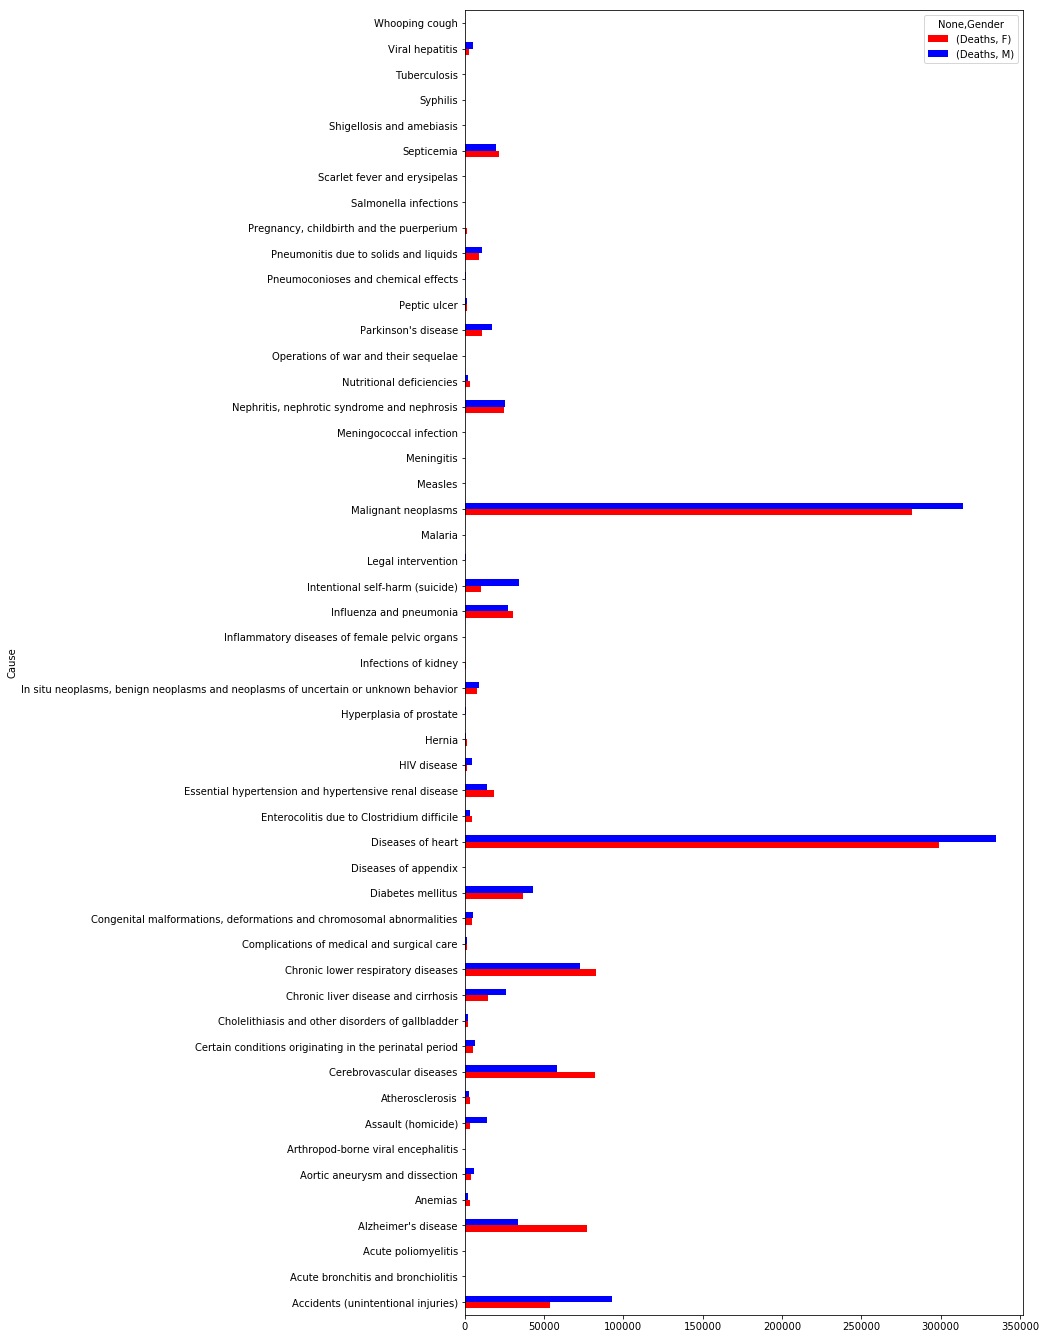

In [29]:
df2015\
.sort_values('Deaths', ascending = False)\
.groupby(["Cause","Gender"])\
.agg({'Deaths' : sum})\
.unstack(1)\
.plot(kind = "barh", color = ["red", "blue"], legend = True, figsize = [10,24])

<a id="causeXage"></a>
## 死亡: 跟年龄有关的死因

因为这里死因太多了，年龄也多，交叉在一起图表会非常地大，所以我们只选择其中一些死因来可视化：

- "Alzheimer's disease" 
- "Diseases of heart" 
- "Malignant neoplasms" 
- "Accidents (unintentional injuries)"

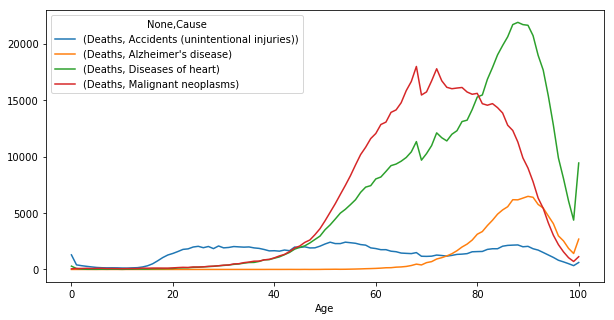

In [30]:
clist = ["Alzheimer's disease", 
         "Diseases of heart", 
         "Malignant neoplasms", 
         "Accidents (unintentional injuries)"]

df2015_clist = df2015[df2015["Cause"].isin(clist)]

df2015_clist\
.groupby(["Age","Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending = False)\
.unstack(1)\
.plot(kind = "line", legend = True, figsize = [10,5])

<a id="causeXgenderXage"></a>
## 死亡: 死因与性别、年龄的关系

对两个性别、三个年份、51种死因的交叉可视化是十分苦难的。因为内容太多，难以放入一张图中。
最好的做法是选择性地展示一些有意义的数据。


/Users/chenhaopeng/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


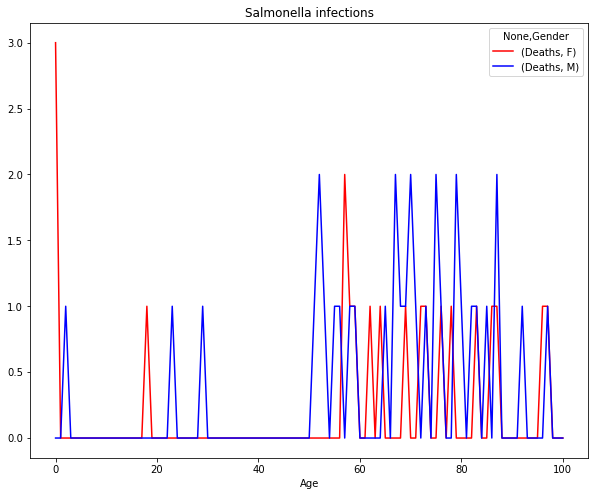

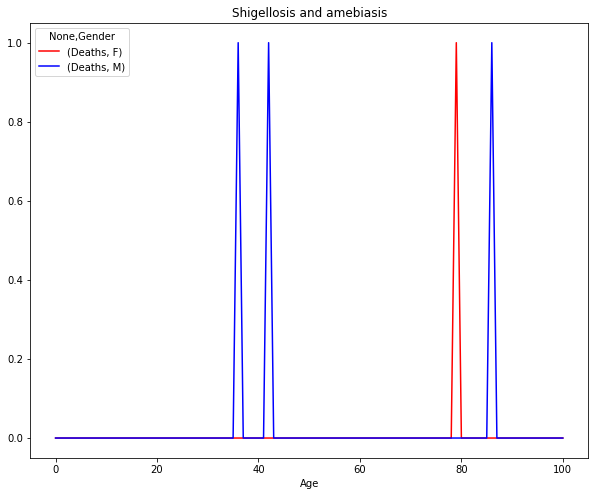

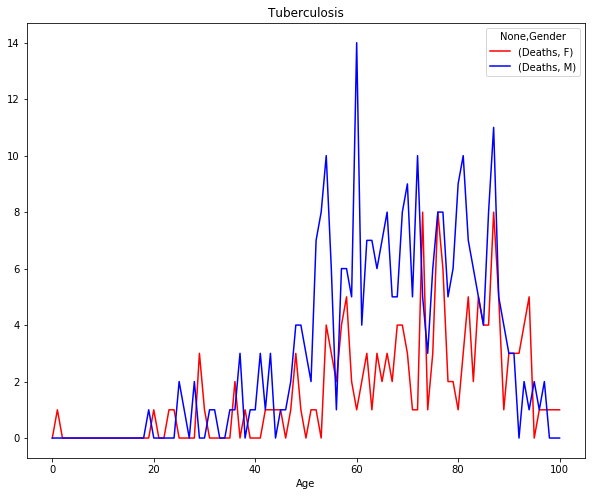

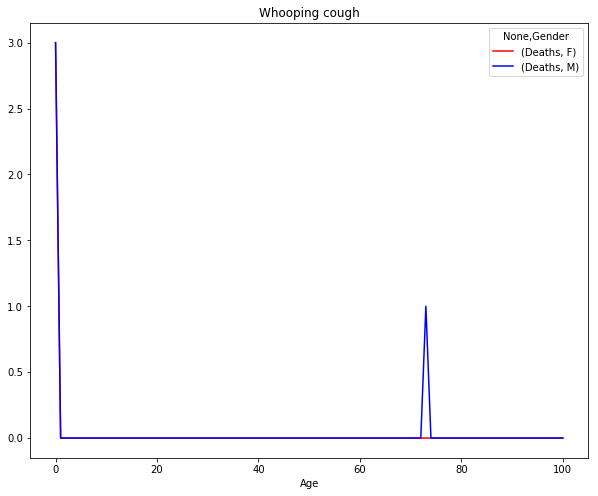

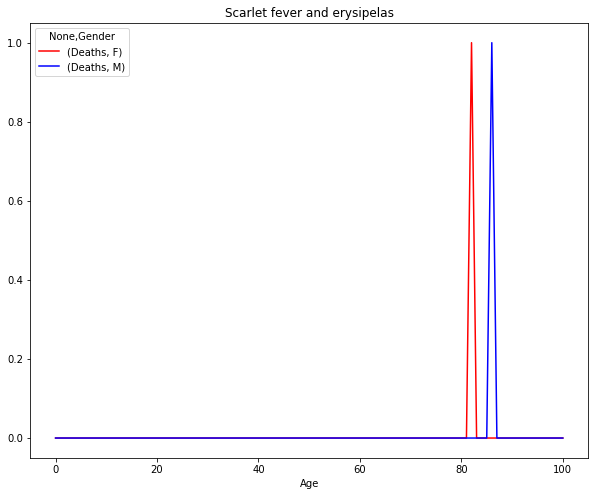

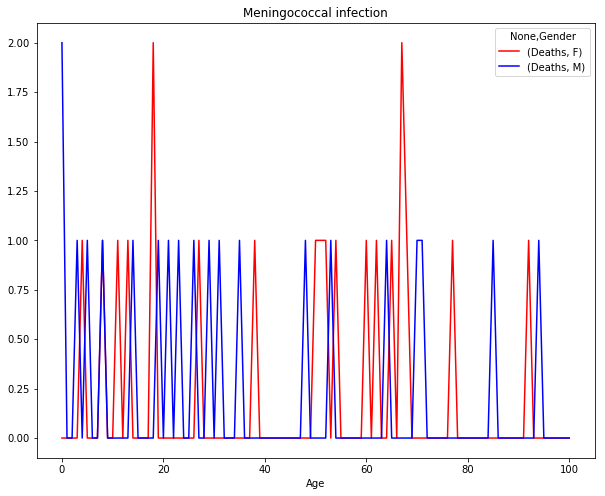

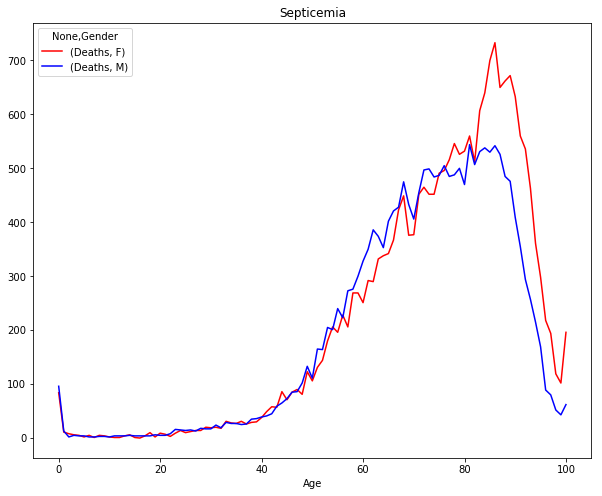

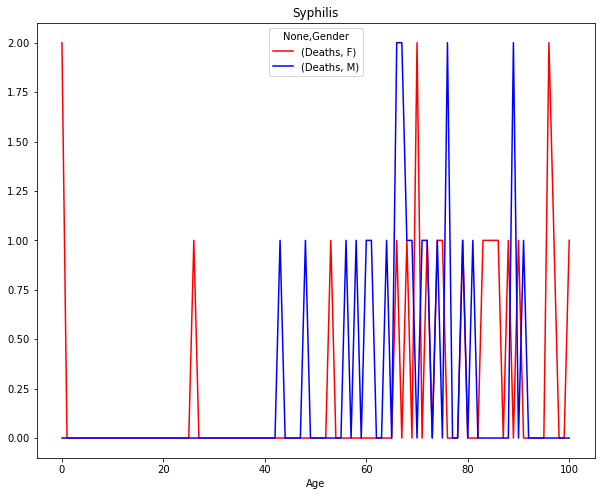

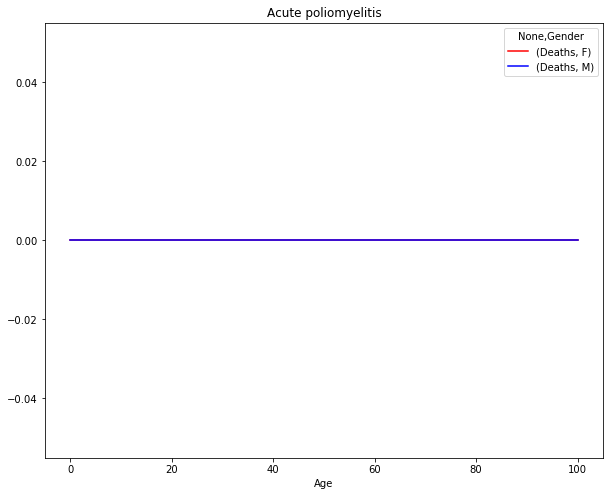

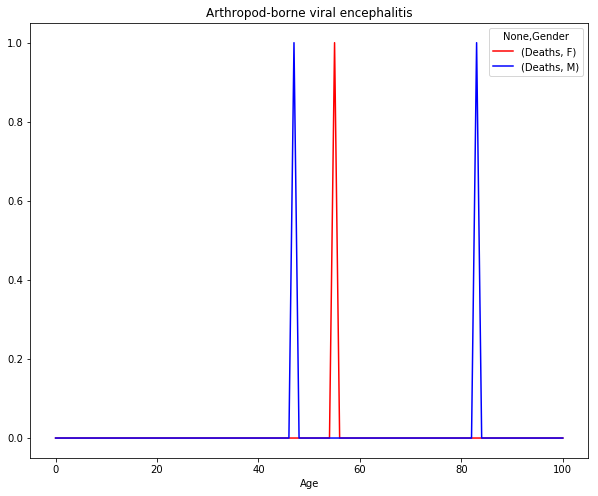

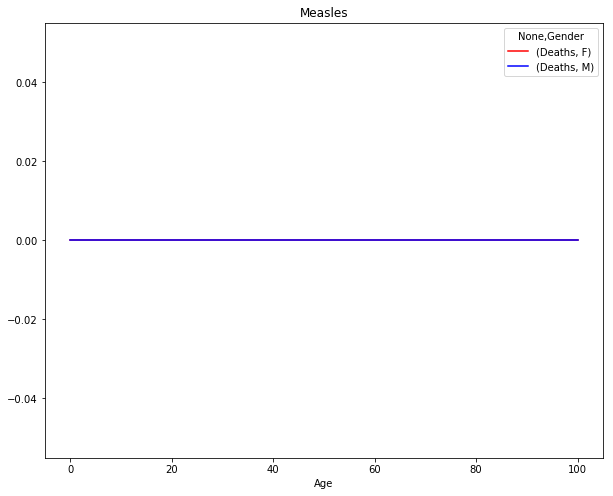

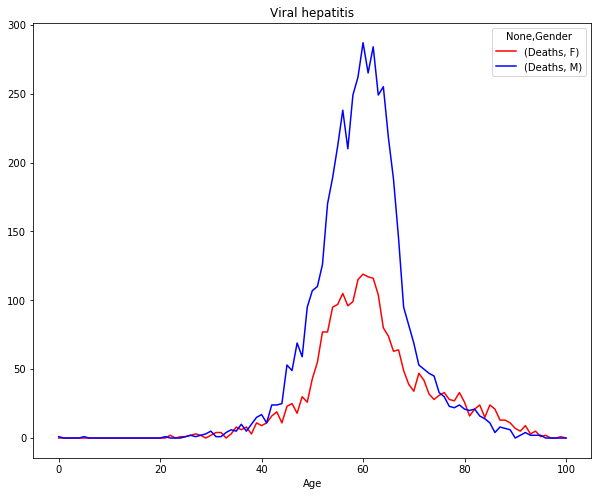

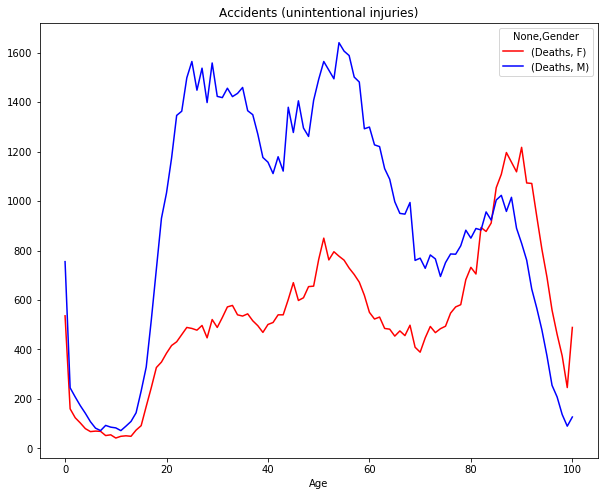

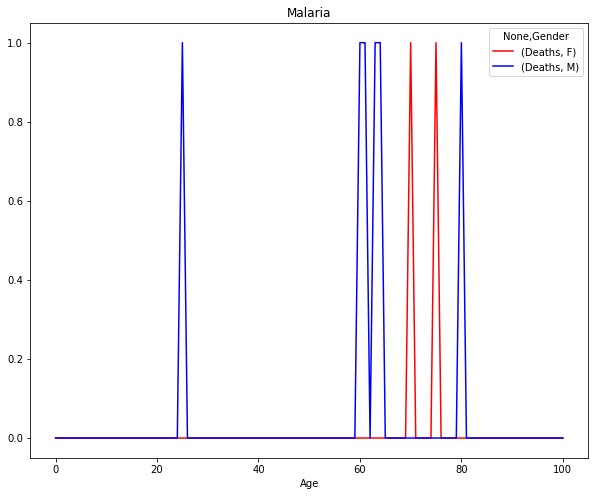

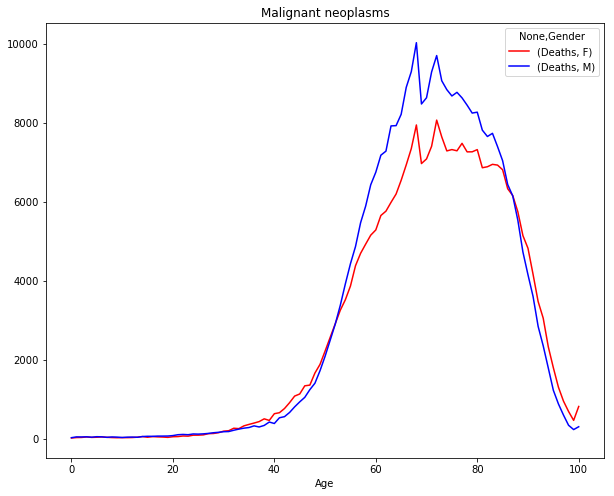

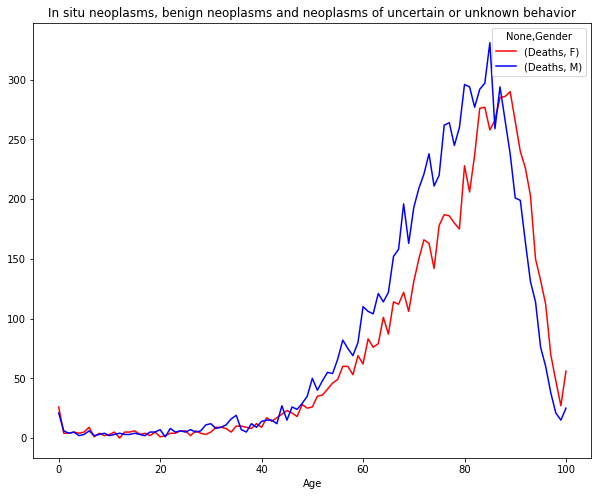

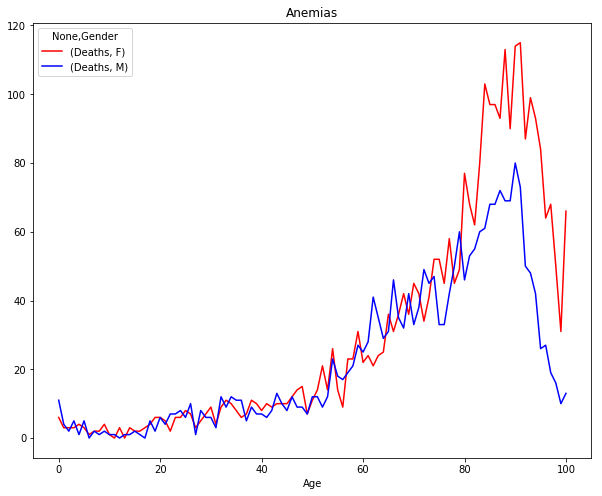

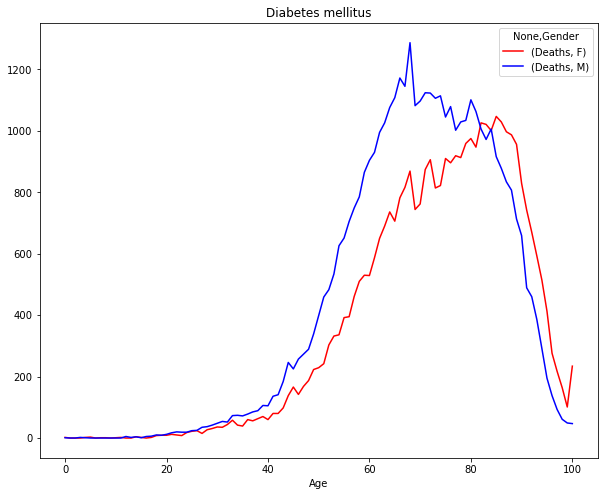

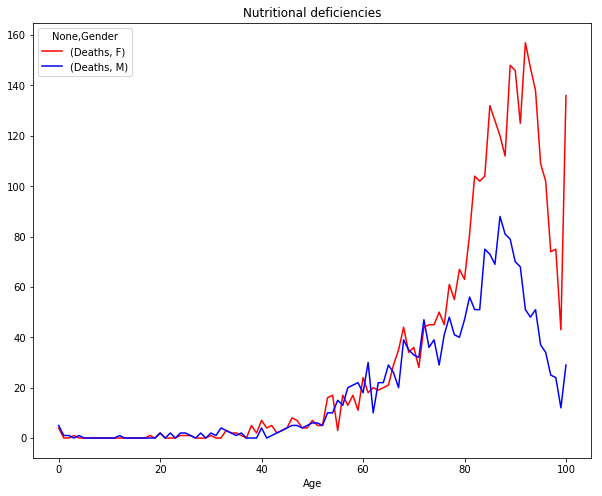

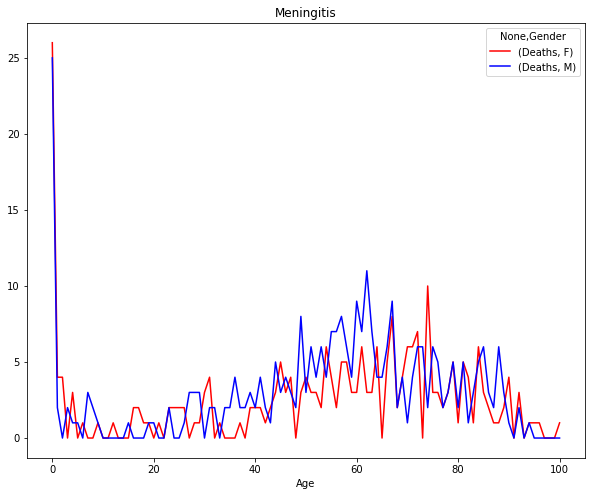

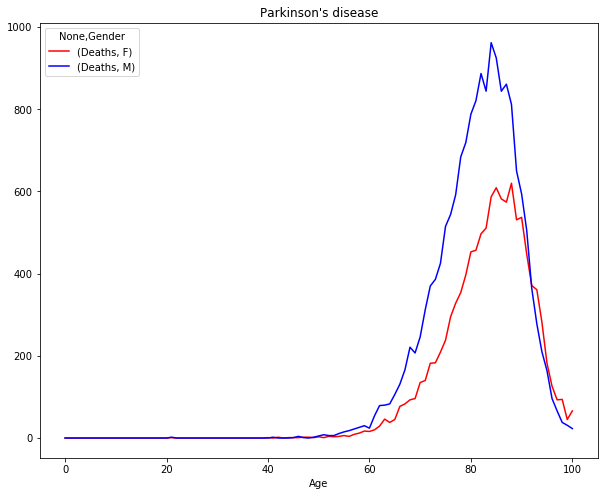

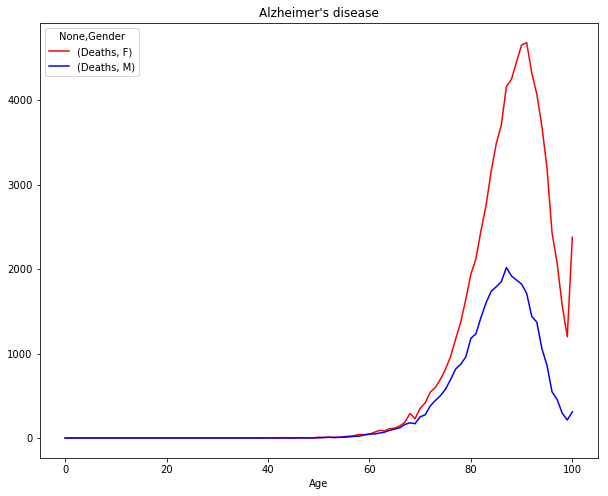

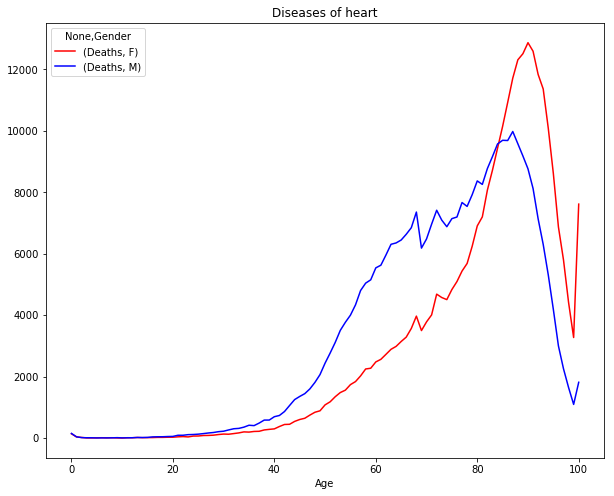

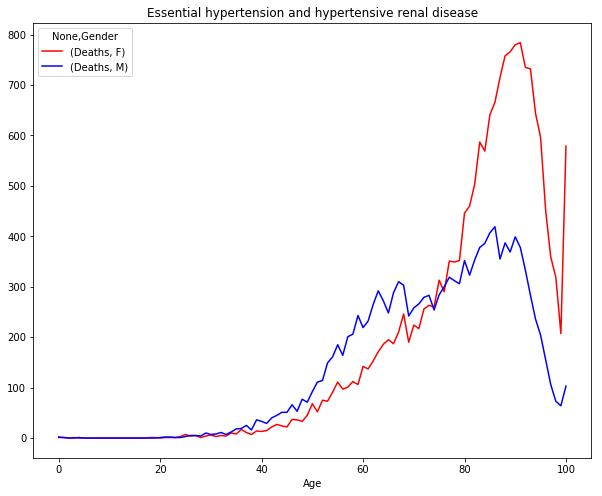

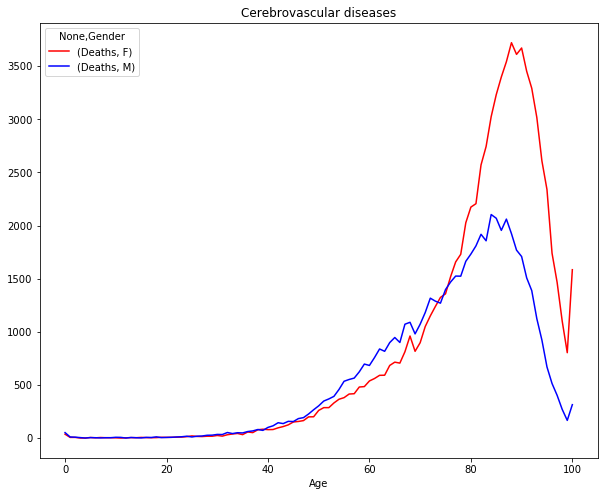

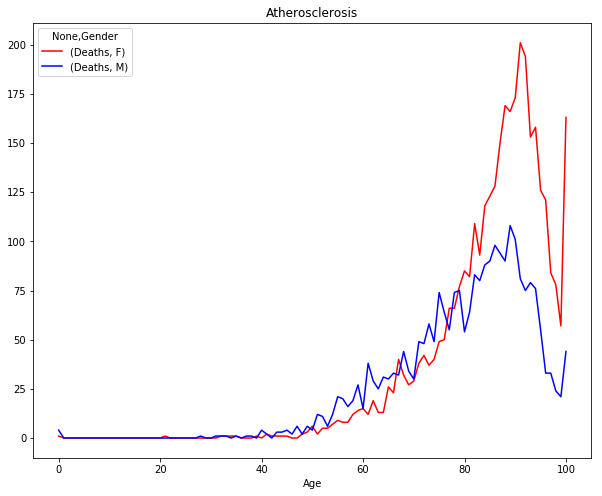

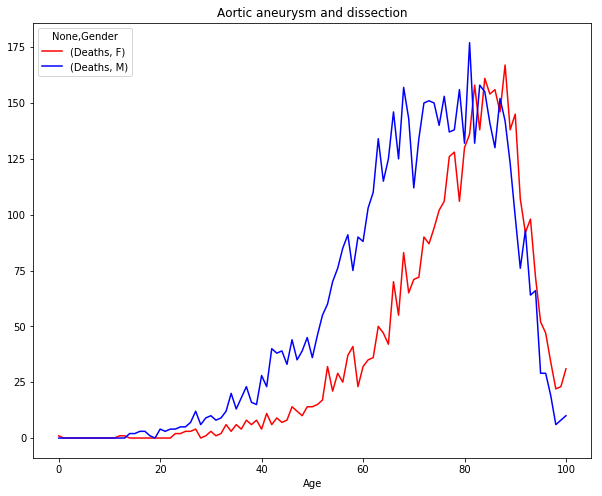

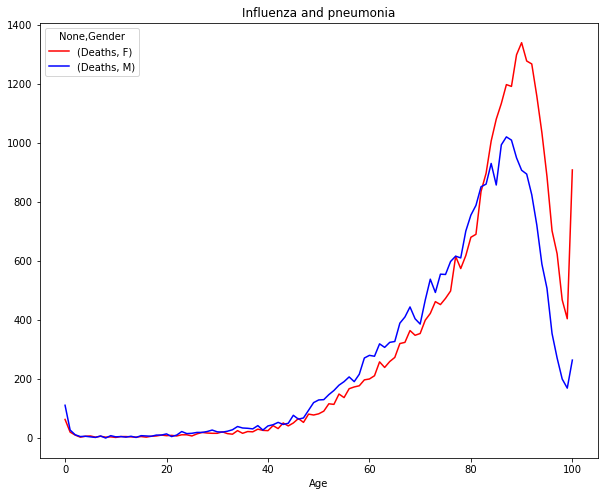

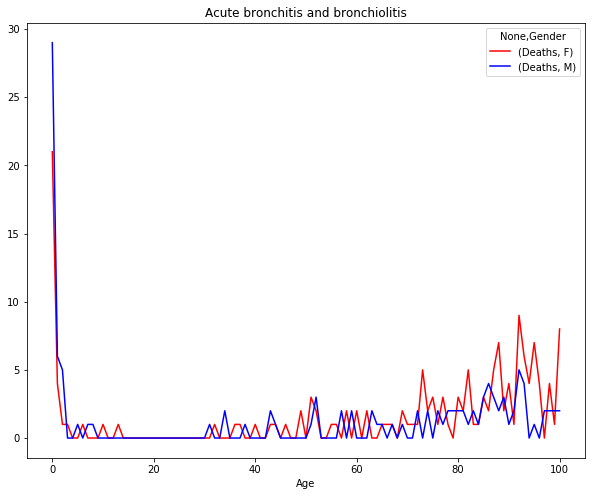

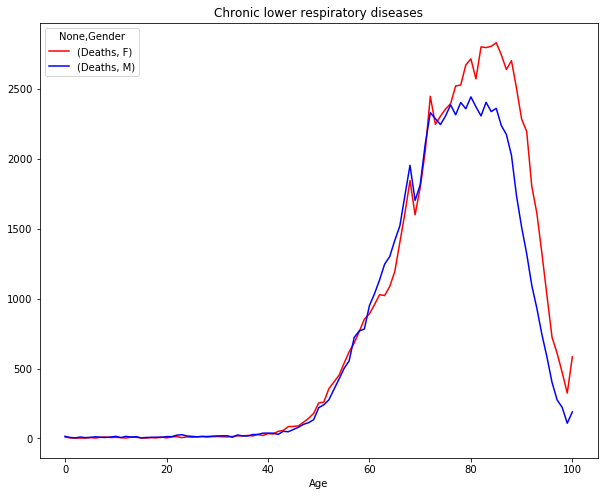

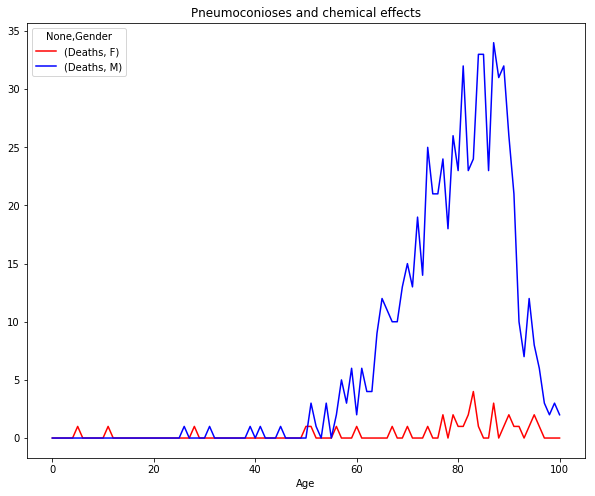

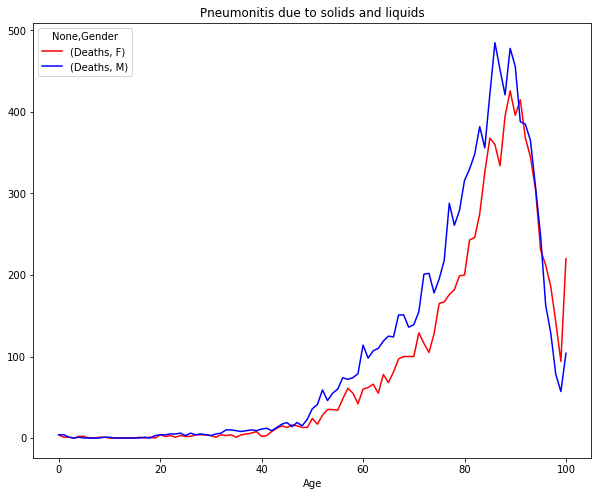

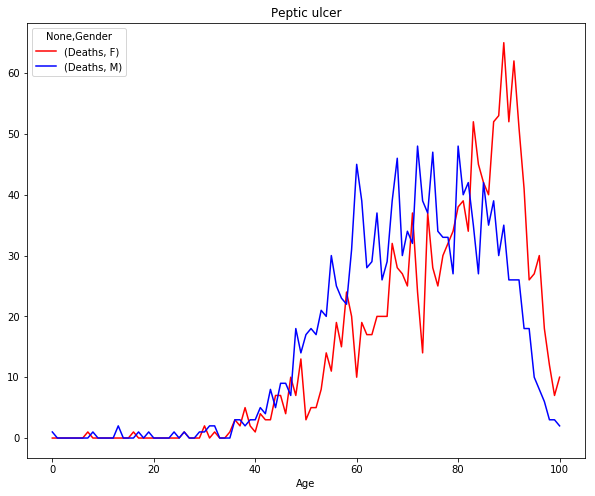

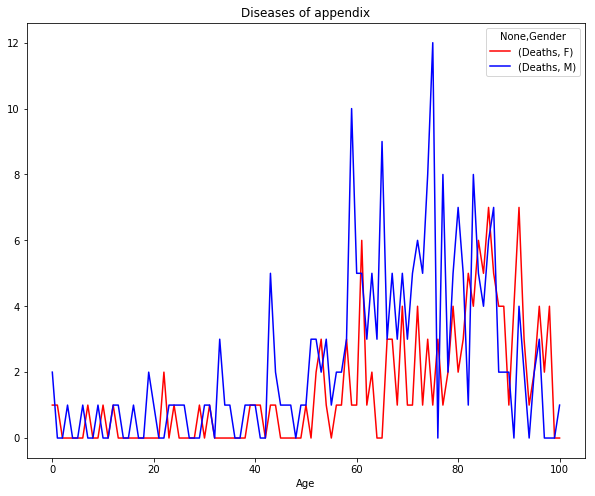

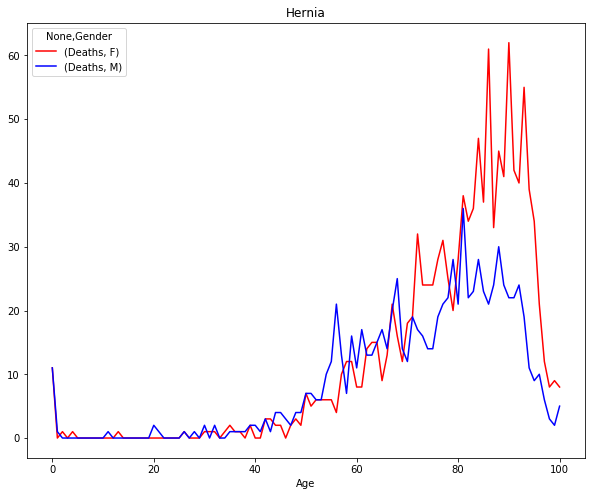

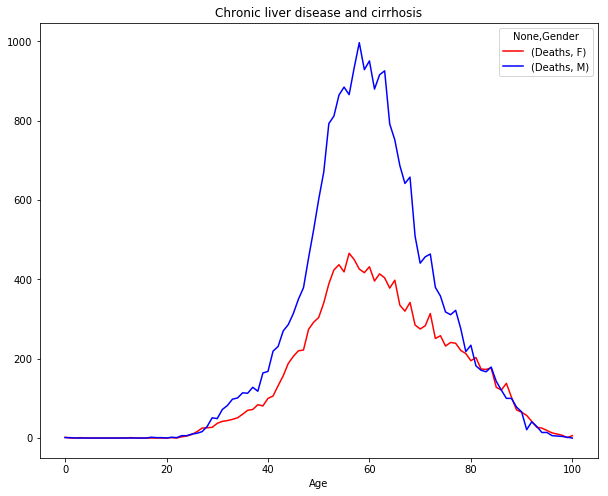

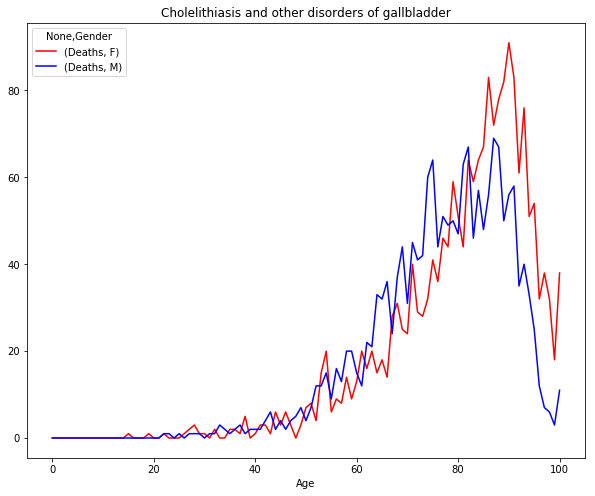

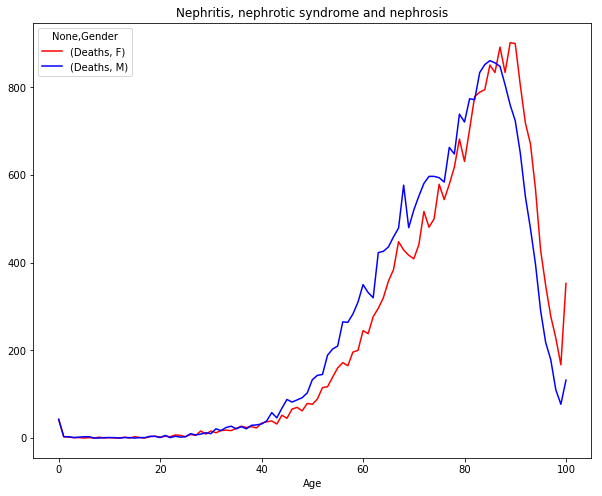

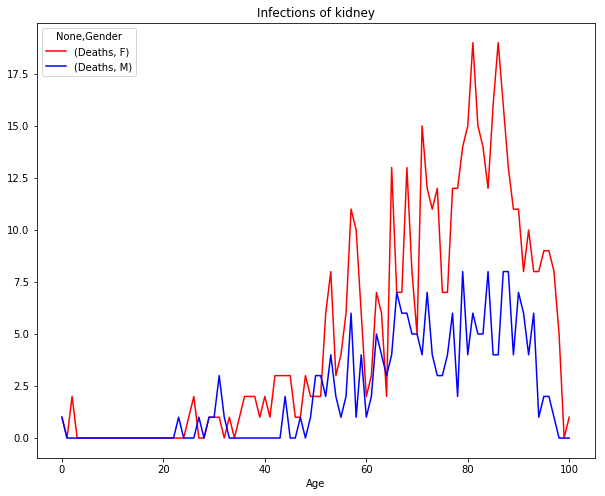

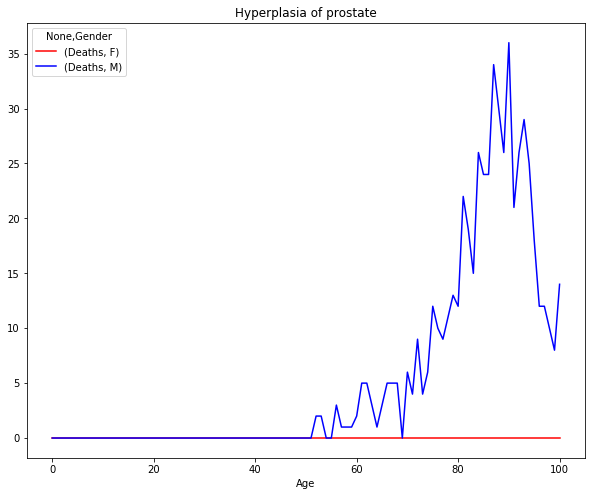

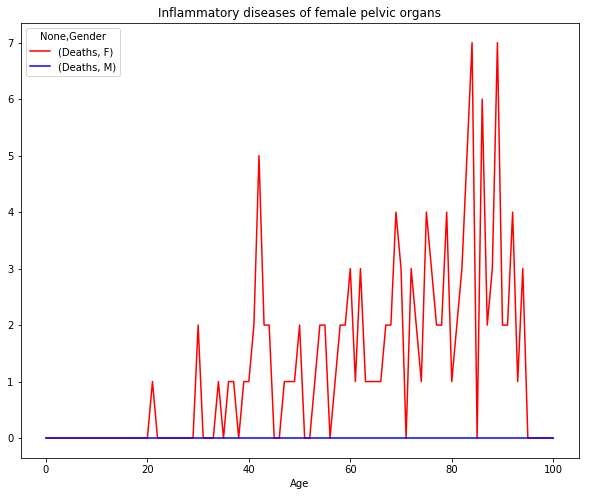

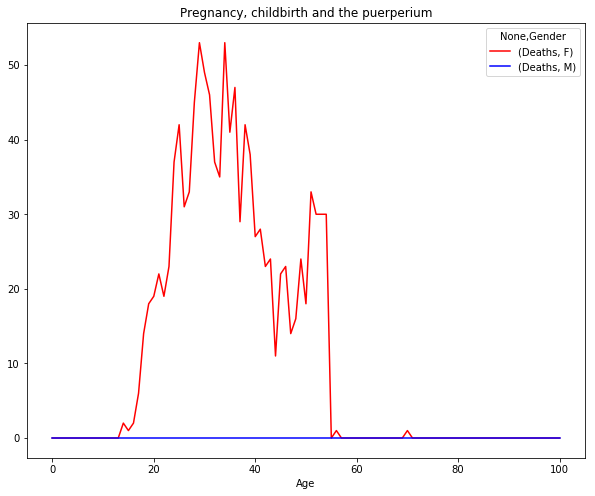

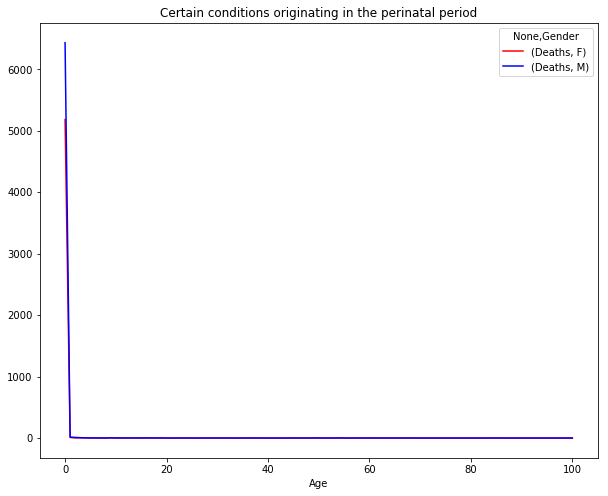

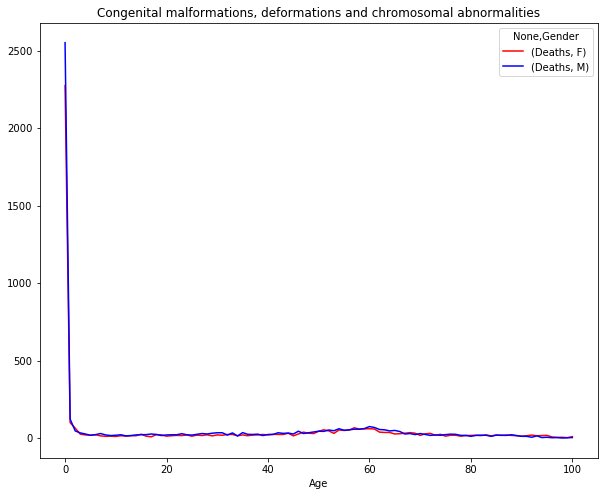

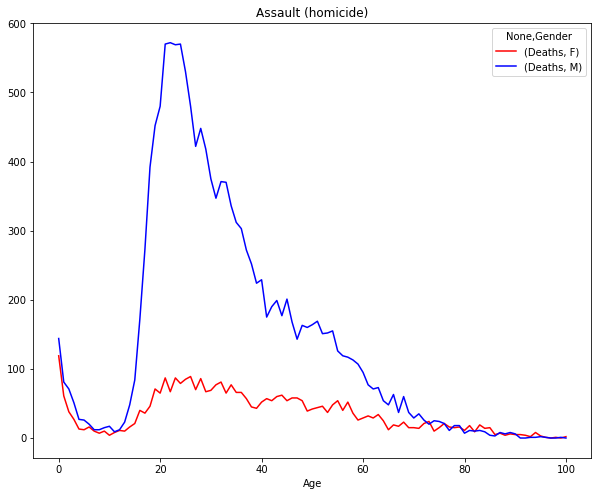

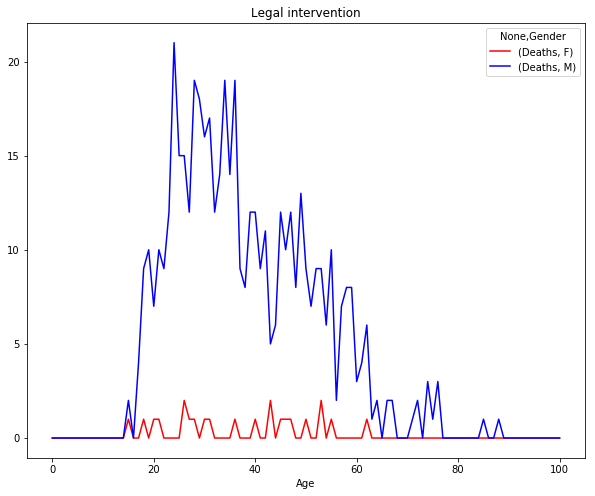

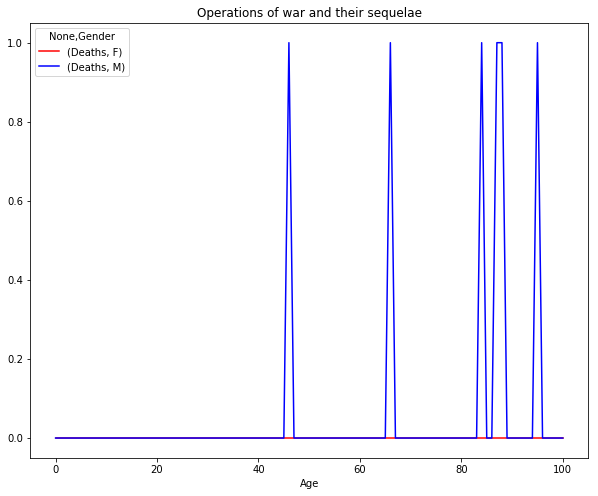

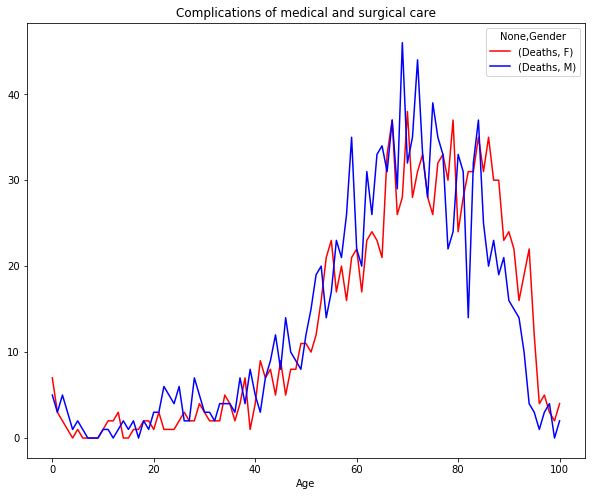

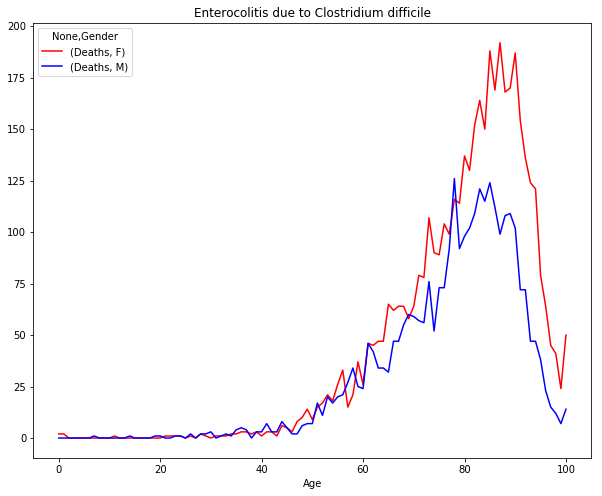

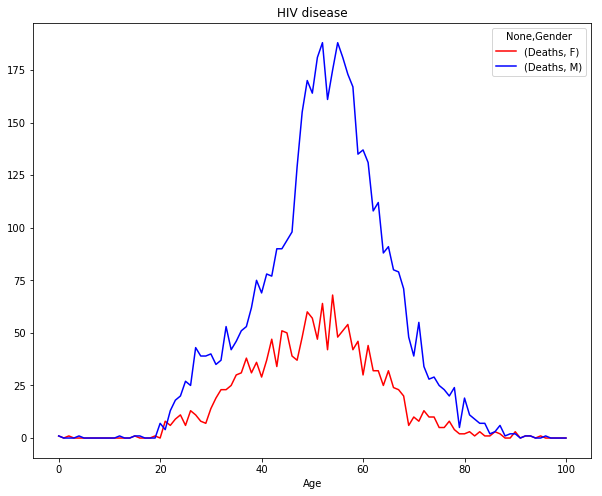

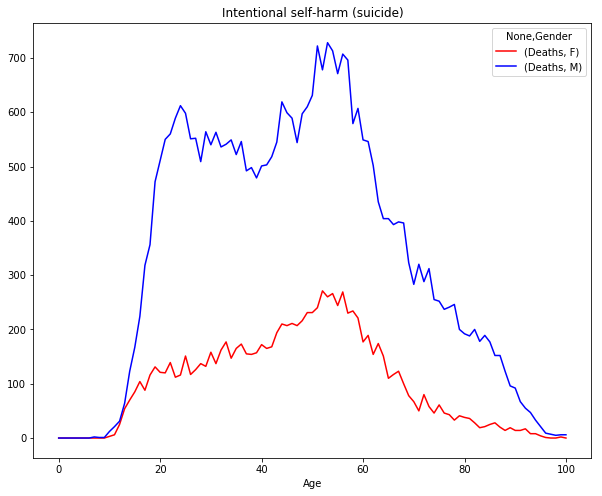

In [31]:
clist = df.Cause.unique()

for cause in clist:
    df2015_clist = df2015[df2015["Cause"].isin([cause])]
    
    df2015_clist\
    .groupby(["Age","Gender"])\
    .agg({'Deaths' : sum})\
    .unstack([1])\
    .plot(kind = "line", legend = True, color=('r','b'), figsize = [10,8], title = str(cause))

<hr>

<font color="green"> 讨论: 上述图中你们发现了什么? </font>